https://www.kaggle.com/ryanstonebraker/friends-transcript/version/5

предсказываем автора цитаты

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import *
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('friends_quotes.csv')
data.astype(float, errors='ignore')

,author,episode_number,episode_title,quote,quote_order,season
0,Monica,1.0,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,0.0,1.0
1,Joey,1.0,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1.0,1.0
2,Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",2.0,1.0
3,Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
4,Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",4.0,1.0
...,...,...,...,...,...,...
60286,Chandler,17.0,"The Last One, Part I & II","Oh, it's gonna be okay.",581.0,10.0
60287,Rachel,17.0,"The Last One, Part I & II",(crying) Do you guys have to go to the new hou...,582.0,10.0
60288,Monica,17.0,"The Last One, Part I & II",We got some time.,583.0,10.0
60289,Rachel,17.0,"The Last One, Part I & II","Okay, should we get some coffee?",584.0,10.0


In [3]:
data.shape

(60291, 6)

In [4]:
columns = ['author', 'episode_number', 'episode_title', 'quote', 'quote_order', 'season']
data1 = data.loc[:, columns].copy(deep=True).reset_index(drop=True)
le = preprocessing.LabelEncoder()
for c in ['author', 'episode_number', 'episode_title', 'quote', 'quote_order', 'season']:
    data1[c] = le.fit_transform(data1[c])

In [5]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

In [6]:
data2 = data1[0:10000]
print(len(data2))

10000


In [7]:
data2

,author,episode_number,episode_title,quote,quote_order,season
0,579,0,53,38870,0,0
1,425,0,53,9466,1,0
2,166,0,53,6552,2,0
3,684,0,53,40766,3,0
4,684,0,53,21436,4,0
...,...,...,...,...,...,...
9995,733,17,22,6005,158,1
9996,727,17,22,31126,159,1
9997,512,17,22,25088,160,1
9998,727,17,22,31242,161,1


In [13]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    Tree = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
    prediction = model_selection.cross_val_predict(Tree, data2.loc[:, data2.columns!='author'], data2['author'], cv=cv)
    acc = metrics.accuracy_score(data2['author'], prediction)
    print('Tree: {:6.4}'.format(acc))

    RandomForest = ensemble.RandomForestClassifier(n_estimators=250, max_depth=10                                          )
    prediction = model_selection.cross_val_predict(RandomForest, data2.loc[:, data2.columns!='author'], data2['author'], cv=cv)
    acc = metrics.accuracy_score(data2['author'], prediction)
    print('Random forest: {:6.4}'.format(acc))

    XGBoost = xgb.XGBClassifier(eval_metric='logloss')
    prediction = model_selection.cross_val_predict(XGBoost, data2.loc[:, data2.columns!='author'], data2['author'], cv=cv)
    acc = metrics.accuracy_score(data2['author'], prediction)
    print('XGBoost: {:6.4}'.format(acc))

    LightGBM = lgb.LGBMClassifier(verbosity=-1)
    prediction = model_selection.cross_val_predict(LightGBM, data2.loc[:, data2.columns!='author'], data2['author'], cv=cv)
    acc = metrics.accuracy_score(data2['author'], prediction)
    print('LightGBM: {:6.4}'.format(acc))

    CatBoost = CatBoostClassifier(logging_level='Silent', learning_rate=0.015)
    prediction = model_selection.cross_val_predict(CatBoost, data2.loc[:, data2.columns!='author'], data2['author'], cv=cv)
    acc = metrics.accuracy_score(data2['author'], prediction)
    print('CatBoost: {:6.4}'.format(acc))

Tree:  0.161
Random forest: 0.2734
XGBoost: 0.2723
LightGBM: 0.0806
CatBoost: 0.2538
Wall time: 1h 31min 16s


In [67]:
data3 = data1[0:1000]
data3.astype(float, errors='ignore')
print(len(data3))

1000


In [68]:
cv1 = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

In [69]:
%%time
Tree = tree.DecisionTreeClassifier(max_depth=10, criterion='entropy')
prediction = model_selection.cross_val_predict(Tree, data3.loc[:, data3.columns!='author'], data3['author'], cv=cv1)
acc = metrics.accuracy_score(data3['author'], prediction)
print('Tree: {:6.4}'.format(acc))

Tree:   0.24
Wall time: 134 ms


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [70]:
%%time
RandomForest = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10)
prediction = model_selection.cross_val_predict(RandomForest, data3.loc[:, data3.columns!='author'], data3['author'], cv=cv1)
acc = metrics.accuracy_score(data3['author'], prediction)
print('Random forest: {:6.4}'.format(acc))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random forest:  0.245
Wall time: 2.81 s


In [71]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
XGBoost = xgb.XGBClassifier(eval_metric='logloss')
prediction = model_selection.cross_val_predict(XGBoost, data3.loc[:, data3.columns!='author'], data3['author'], cv=cv1)
acc = metrics.accuracy_score(data3['author'], prediction)
print('XGBoost: {:6.4}'.format(acc))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers s

XGBoost:  0.235
Wall time: 13.3 s


In [58]:
%%time
LightGBM = lgb.LGBMClassifier(verbosity=-1)
prediction = model_selection.cross_val_predict(LightGBM, data3.loc[:, data3.columns!='author'], data3['author'], cv=cv1)
acc = metrics.accuracy_score(data3['author'], prediction)
print('LightGBM: {:6.4}'.format(acc))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


LightGBM:  0.241
Wall time: 13.3 s


In [66]:
from alive_progress import alive_bar

method = XGBoost
# важность признаков
with alive_bar(len(data3.columns)) as bar:
    importance = {}
    for c in data3.columns:
        if c == 'author': continue
        # пытаемся предсказать результат, используя только один столбец
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            prediction = model_selection.cross_val_predict(method, 
                                                           data3[c].values.reshape(-1,1),
                                                           data3['author'],
                                                           cv=cv)
        importance[c] = metrics.accuracy_score(data3['author'], prediction)
        bar()
    cols = list(importance.keys())
    fi = np.array([importance[c] for c in cols])

|█████████████████████████████████▍⚠︎     | (!) 5/6 [83%] in 40.0s (0.12/s)


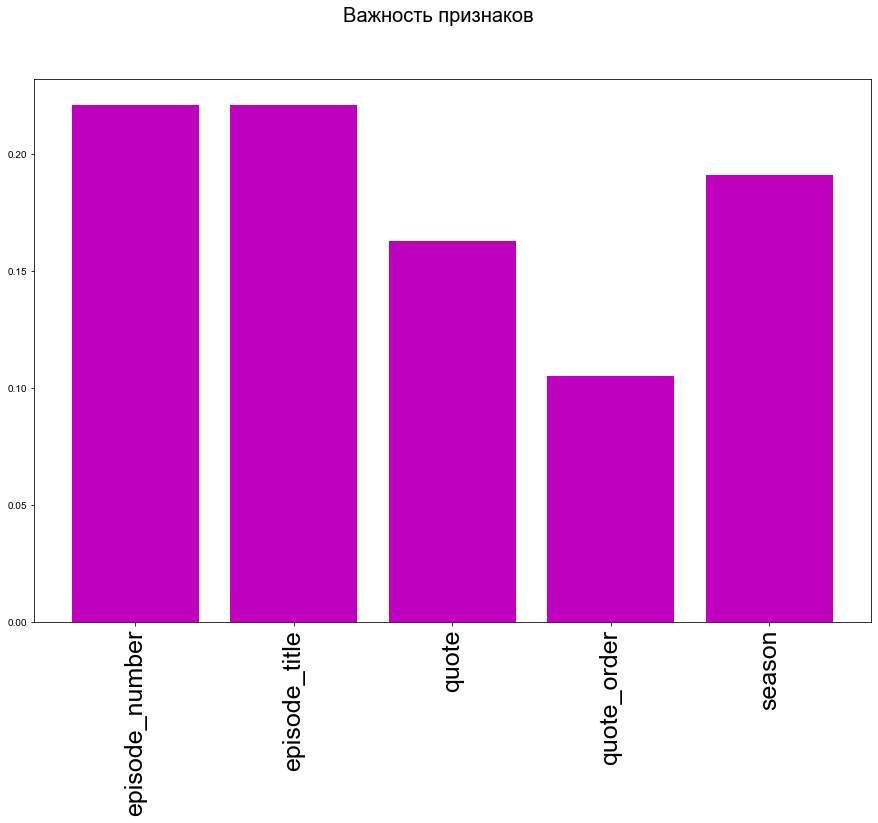

In [65]:
fig = plt.figure(figsize=(15,10))
plt.rc('font', family='Arial')
plt.rcParams['xtick.labelsize'] = 25
plt.bar(np.arange(len(cols)), fi, color='m')
plt.xticks(np.arange(len(cols)), cols, rotation='vertical')
_ = fig.suptitle('Важность признаков', fontsize=20)